In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [4]:
data = pd.read_csv('airline-passengers.csv')

In [5]:
data.head()

,month,total_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             144 non-null    object
 1   total_passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
data.describe(include='all')

,month,total_passengers
count,144,144.000000
unique,144,NaN
top,1949-01,NaN
freq,1,NaN
mean,NaN,280.298611
std,NaN,119.966317
min,NaN,104.000000
25%,NaN,180.000000
50%,NaN,265.500000
75%,NaN,360.500000


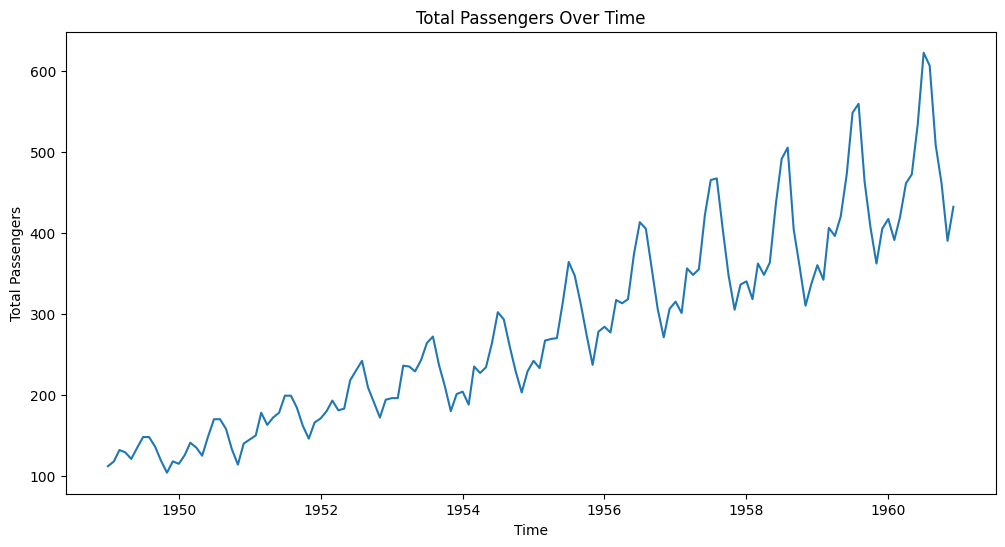

In [8]:
# Convert 'Month' to datetime
data['month'] = pd.to_datetime(data['month'])

# Set 'Month' as index
data.set_index('month', inplace=True)

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(data['total_passengers'])
plt.title('Total Passengers Over Time')
plt.xlabel('Time')
plt.ylabel('Total Passengers')
plt.show()

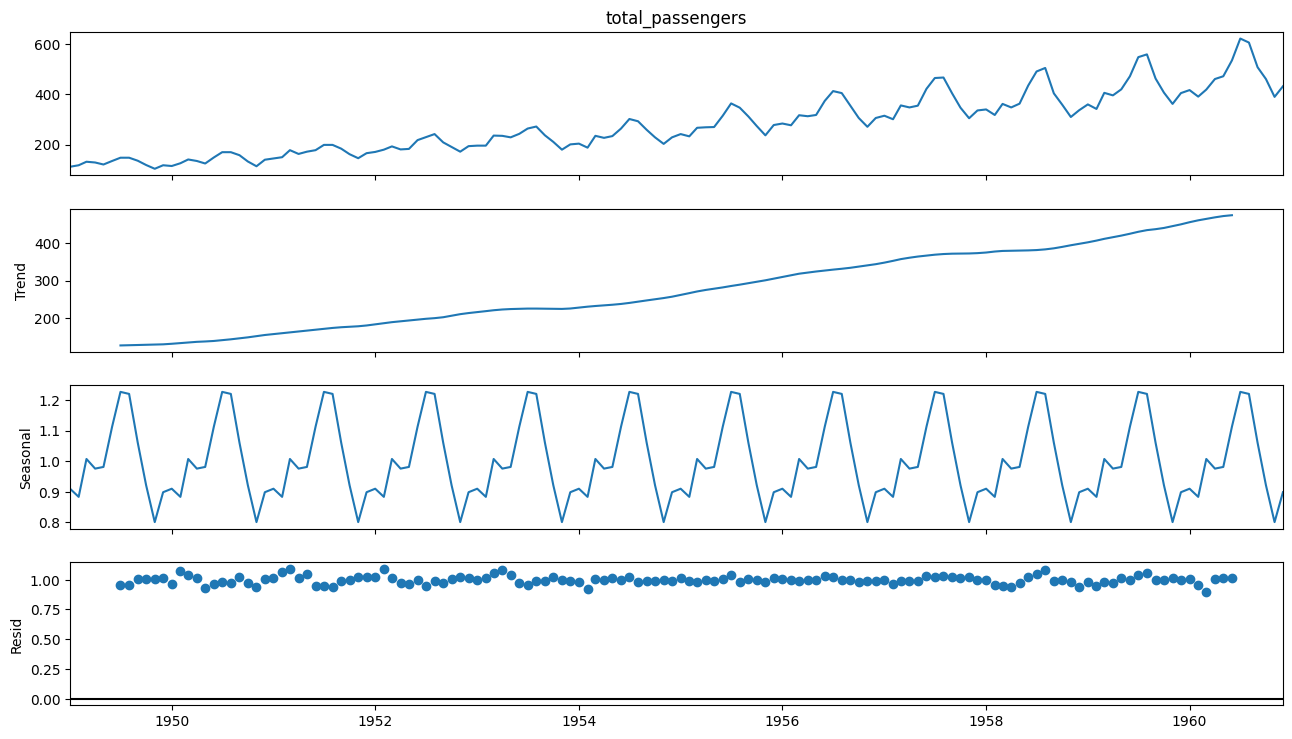

In [9]:
decomposition = seasonal_decompose(data['total_passengers'], model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

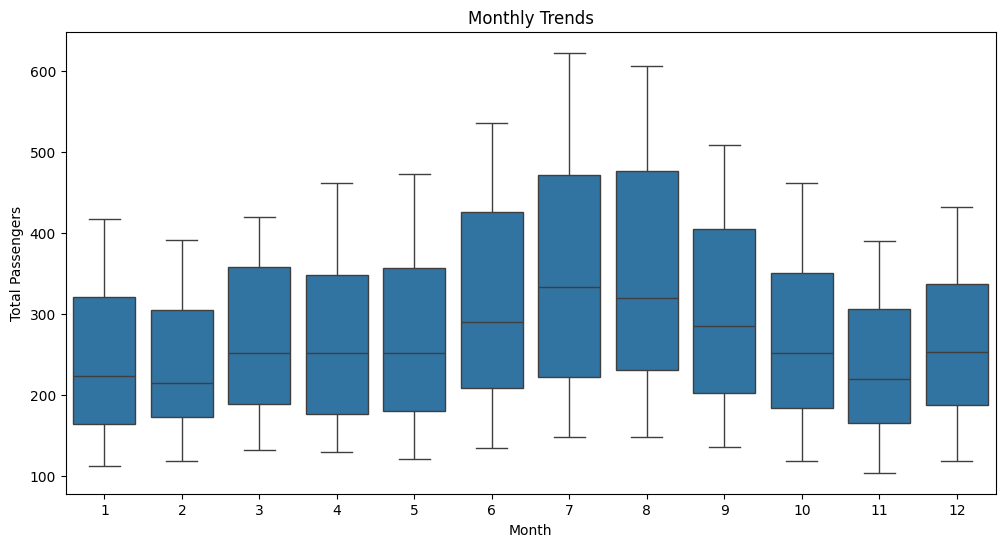

In [10]:
# Monthly Trends

# Extracting month and year
data['Year'] = data.index.year
data['Month_num'] = data.index.month

# Monthly Trends Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month_num', y='total_passengers', data=data)
plt.title('Monthly Trends')
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.show()

In [11]:
data.isnull().sum(axis=0)

total_passengers    0
Year                0
Month_num           0
dtype: int64

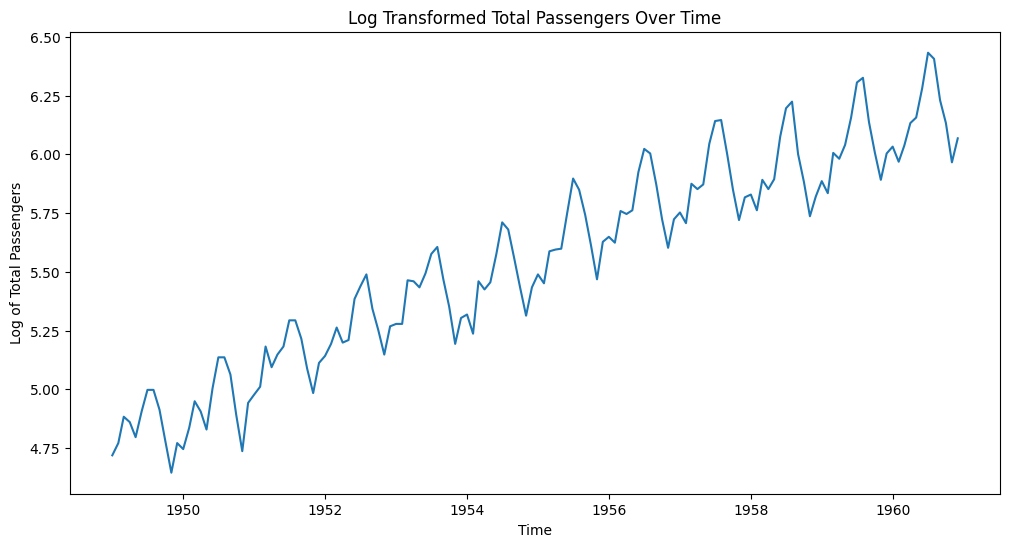

In [12]:
data['Log_Passengers'] = np.log(data['total_passengers'])
plt.figure(figsize=(12, 6))
plt.plot(data['Log_Passengers'])
plt.title('Log Transformed Total Passengers Over Time')
plt.xlabel('Time')
plt.ylabel('Log of Total Passengers')
plt.show()

In [13]:
result = adfuller(data['Log_Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.7170170891069683
p-value: 0.4223667747703874


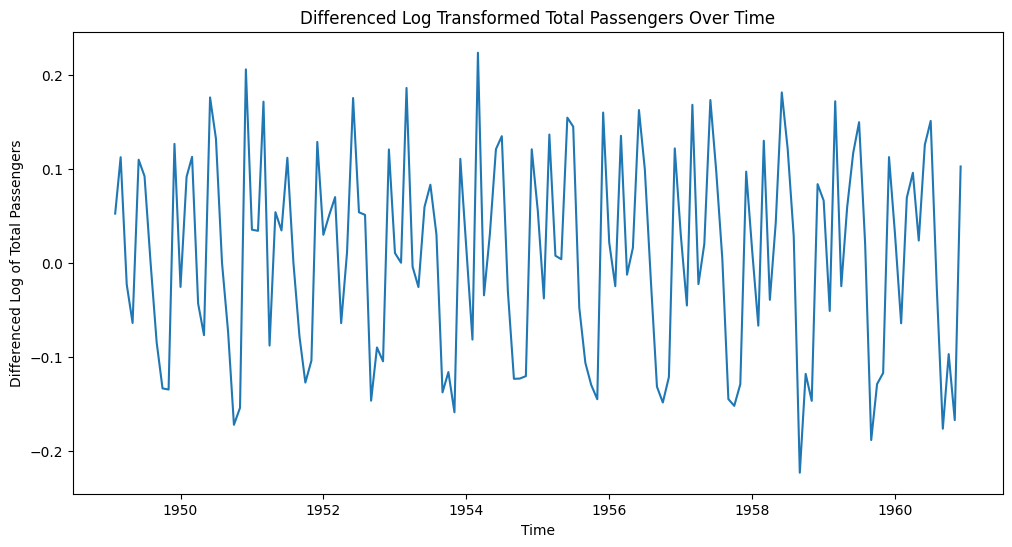

In [14]:
data['Differenced'] = data['Log_Passengers'].diff().dropna()
plt.figure(figsize=(12, 6))
plt.plot(data['Differenced'])
plt.title('Differenced Log Transformed Total Passengers Over Time')
plt.xlabel('Time')
plt.ylabel('Differenced Log of Total Passengers')
plt.show()

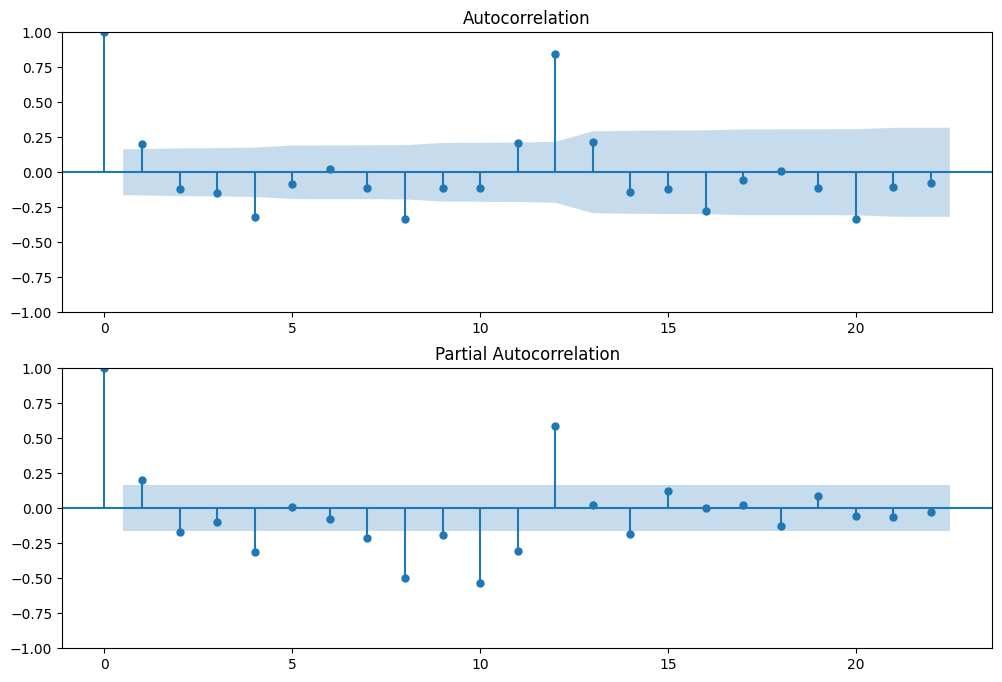

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['Differenced'].dropna(), ax=ax[0])
plot_pacf(data['Differenced'].dropna(), ax=ax[1])
plt.show()

In [16]:
# Train-Test Split
train = data[:int(0.8*(len(data)))]
test = data[int(0.8*(len(data))):]

In [17]:
model = ARIMA(train['Log_Passengers'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Log_Passengers   No. Observations:                  115
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 101.611
Date:                Sat, 06 Jul 2024   AIC                           -197.221
Time:                        16:23:26   BIC                           -189.013
Sample:                    01-01-1949   HQIC                          -193.890
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5722      0.184     -3.105      0.002      -0.933      -0.211
ma.L1          0.8376      0.109      7.672      0.000       0.624       1.052
sigma2         0.0098      0.002      5.359      0.0

/home/user/upgrade/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/user/upgrade/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/user/upgrade/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
model = SARIMAX(train['Log_Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

/home/user/upgrade/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/user/upgrade/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.60847D+00    |proj g|=  5.10845D+00

At iterate    5    f= -1.62725D+00    |proj g|=  9.61368D-01

At iterate   10    f= -1.63761D+00    |proj g|=  7.43064D-02

At iterate   15    f= -1.63769D+00    |proj g|=  2.66020D-01

At iterate   20    f= -1.64264D+00    |proj g|=  1.17104D+00

At iterate   25    f= -1.64372D+00    |proj g|=  1.76175D-02

At iterate   30    f= -1.64373D+00    |proj g|=  6.26671D-03

At iterate   35    f= -1.64374D+00    |proj g|=  4.37006D-02

At iterate   40    f= -1.64379D+00    |proj g|=  8.47036D-02

At iterate   45    f= -1.64405D+00    |proj g|=  1.22148D-01

At iterate   50    f= -1.64665D+00    |proj g|=  1.28044D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/user/upgrade/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
forecast = model_fit.get_forecast(steps=len(test))
forecasted = forecast.predicted_mean

In [20]:
rmse = np.sqrt(mean_squared_error(test['Log_Passengers'], forecasted))
mae = mean_absolute_error(test['Log_Passengers'], forecasted)
print('RMSE:', rmse)
print('MAE:', mae)

RMSE: 0.035587043910809704
MAE: 0.029184699820765905


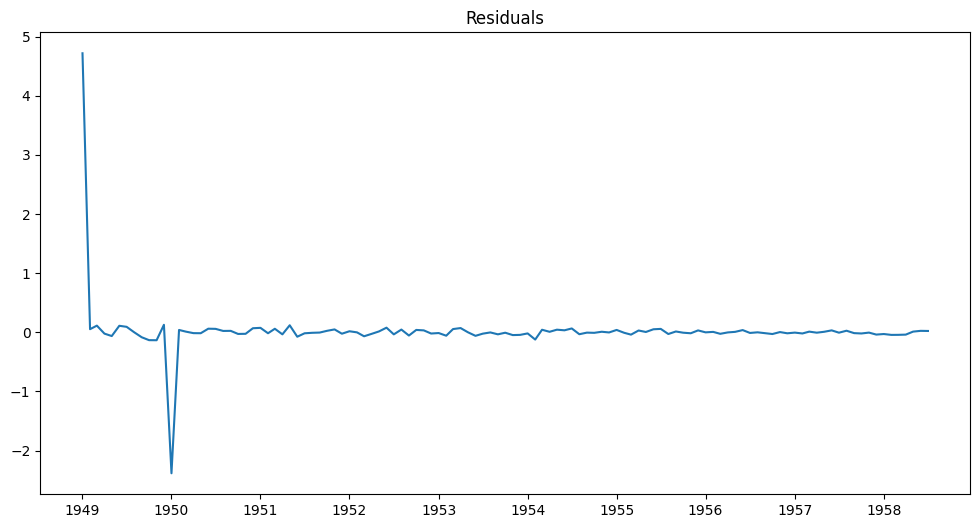

In [21]:
### Residual Analysis

residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

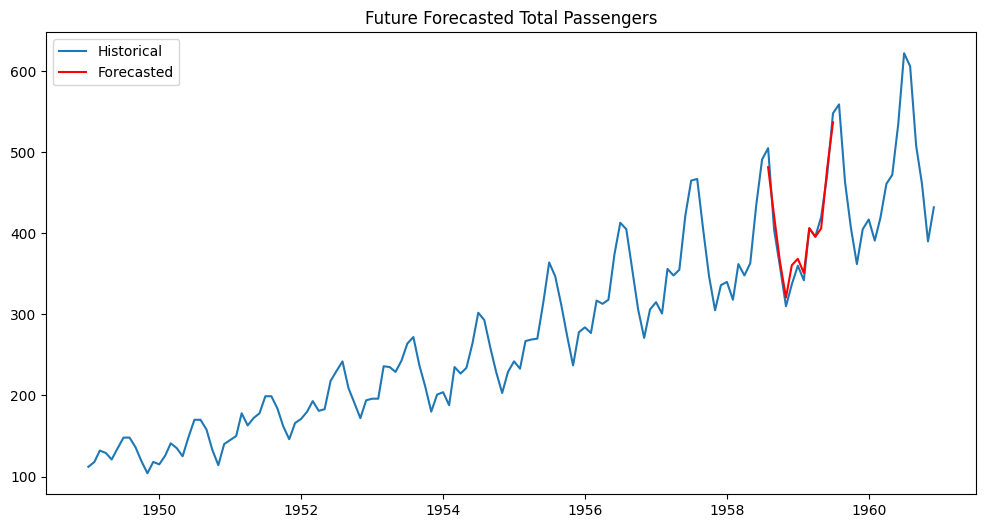

In [22]:
future_forecast = model_fit.get_forecast(steps=12)
future_forecasted = future_forecast.predicted_mean

# Convert back to original scale
future_forecasted = np.exp(future_forecasted)
plt.figure(figsize=(12, 6))
plt.plot(data['total_passengers'], label='Historical')
plt.plot(future_forecasted, label='Forecasted', color='red')
plt.legend()
plt.title('Future Forecasted Total Passengers')
plt.show()